In [2]:
%pylab inline
import gc
import galsim
import numpy as np
import fpfsBase
import astropy.io.fits as pyfits

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [149]:
ngrid       =   64
nx          =   100
ny          =   100
ndata       =   nx*ny
scale       =   0.168
psfFWHM =   0.6
psfInt  =   galsim.Moffat(beta=3.5,fwhm=psfFWHM,trunc=psfFWHM*4.)
psfInt  =   psfInt.shear(e1=0.02,e2=-0.02)
psfImg  =   psfInt.drawImage(nx=45,ny=45,scale=scale)
print('PSF FWHM: %.3f arcsec' % (psfImg.FindAdaptiveMom().moments_sigma*scale*2.355))

PSF FWHM: 0.678 arcsec


galaxy radius: 2.50
galaxy radius: 2.37


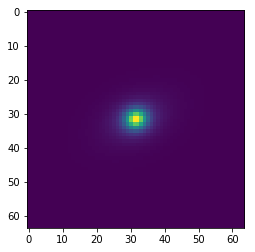

In [150]:
gal_image=galsim.fits.read('sim20210301/galaxy_basic_psf60/image-0-g1-0000.fits')
for i in range(1858,1859):
    ix      =   i%nx
    iy      =   i//nx
    b       =   galsim.BoundsI(ix*ngrid,(ix+1)*ngrid-1,iy*ngrid,(iy+1)*ngrid-1)
    sub_img =   gal_image[b]
    plt.close()
    plt.imshow(sub_img.array)
    try:
        print('galaxy radius: %.2f' %sub_img.FindAdaptiveMom().moments_sigma)
        print('galaxy radius: %.2f' %galsim.hsm.EstimateShear(sub_img,psfImg).moments_sigma)
    except:
        pass

galaxy radius: 2.51
galaxy radius: 2.38


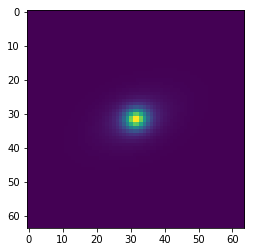

In [151]:
gal_image=galsim.fits.read('sim20210301/galaxy_basic_psf60/image-0-g1-2222.fits')
for i in range(1858,1859):
    ix      =   i%nx
    iy      =   i//nx
    b       =   galsim.BoundsI(ix*ngrid,(ix+1)*ngrid-1,iy*ngrid,(iy+1)*ngrid-1)
    sub_img =   gal_image[b]
    plt.close()
    plt.imshow(sub_img.array)
    try:
        print('galaxy radius: %.2f' %sub_img.FindAdaptiveMom().moments_sigma)
        print('galaxy radius: %.2f' %galsim.hsm.EstimateShear(sub_img,psfImg).moments_sigma)
    except:
        pass

## Basic Test
+ what hsm measures

In [146]:
galaxy = galsim.Gaussian(flux=1.0, sigma=1.0)
psf = galsim.Gaussian(flux=1.0, sigma=1.0)
final = galsim.Convolve(galaxy, psf)
final_image = final.drawImage(scale=0.1,method='no_pixel')
final_epsf_image = psf.drawImage(scale=0.1,method='no_pixel')
result = galsim.hsm.EstimateShear(final_image, final_epsf_image)
result2= galsim.hsm.FindAdaptiveMom(final_image)
print(result.moments_sigma,result2.moments_sigma)

14.142135620117188 14.142135620117188


In [140]:
out=pyfits.getdata('sim20210301/galaxy_basic_psf60/hsm-0-g1-0000.fits')
np.arange(10000)[out['regauss_detR']<0]

array([1857])